In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas

In [2]:
POPULATION_SIZE = 500  # Kích thước quần thể
GENERATIONS = 200  # Số thế hệ

In [3]:
items = []  # Vật phẩm chứa weights và values
max_capacity = 0  # Maximum capacity
fitness_history = []  # Danh sách lưu trữ giá trị fitness của các cá thể tốt nhất qua từng thế hệ.

In [4]:
def get_user_input():
    global items, max_capacity, CROSSOVER_RATE, MUTATION_RATE

    # Nhập danh sách vật phẩm và sức chứa
    weights_str = input("Nhập danh sách trọng lượng (phân tách bằng dấu phẩy): ")
    values_str = input("Nhập danh sách giá trị (phân tách bằng dấu phẩy): ")
    max_capacity = int(input("Nhập sức chứa tối đa: "))

    # Nhập tỷ lệ lai ghép và đột biến
    CROSSOVER_RATE = float(input("Nhập tỷ lệ lai ghép (giá trị từ 0 đến 1): "))
    MUTATION_RATE = float(input("Nhập tỷ lệ đột biến (giá trị từ 0 đến 1): "))

    # Chuyển đổi đầu vào thành danh sách trọng lượng và giá trị
    weights = list(map(int, weights_str.split(",")))
    values = list(map(int, values_str.split(",")))
    items = list(zip(weights, values))

    return items, max_capacity, CROSSOVER_RATE, MUTATION_RATE


def get_info():
    print("\nThông tin bài toán:\n")
    stt = 1
    for weight, value in items:
        print(f"Vật phẩm {stt}: Weight = {weight}, Value = {value}")
        stt += 1
    print(f"\nMaximum capacity = {max_capacity}")
    print(f"Crossover rate = {CROSSOVER_RATE}")
    print(f"Mutation rate = {MUTATION_RATE}")


def fitness(individual):
    total_weight = sum(individual[i] * items[i][0] for i in range(len(items)))
    total_value = sum(individual[i] * items[i][1] for i in range(len(items)))
    return total_value if total_weight <= max_capacity else 0


def initialize_population(num_items):
    return [[random.randint(0, 1) for _ in range(num_items)] for _ in range(POPULATION_SIZE)]


def select_population(population):
    sorted_population = sorted(population, key=lambda x: fitness(x), reverse=True)
    return sorted_population[:POPULATION_SIZE]


def crossover(parent1, parent2):
    if len(parent1) <= 1 or len(parent2) <= 1:
        return parent1, parent2
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2


def mutate(individual):
    for i in range(len(individual)):
        if random.random() < MUTATION_RATE:
            individual[i] = 1 - individual[i]
    return individual


def genetic_algorithm():
    global fitness_history

    population = initialize_population(len(items))
    best_individual = max(population, key=lambda ind: fitness(ind))

    # DataFrame để lưu lịch sử fitness và chromosome
    fitness_df = pd.DataFrame(columns=["Generation", "Chromosome", "Best_Fitness", "Mean_Fitness"])

    best_fitness_history = []  # Lưu trữ fitness tốt nhất
    mean_fitness_history = []  # Lưu trữ fitness trung bình

    for gen in range(GENERATIONS):
        selected_population = select_population(population)

        offspring = []
        for i in range(0, len(selected_population), 2):
            if random.random() < CROSSOVER_RATE and i + 1 < len(selected_population):
                child1, child2 = crossover(selected_population[i], selected_population[i + 1])
                offspring.extend([child1, child2])
            else:
                offspring.extend([selected_population[i], selected_population[i + 1]])

        offspring = [mutate(ind) for ind in offspring]

        population.extend(offspring)

        # Cắt tỉa quần thể để đảm bảo kích thước không vượt quá POPULATION_SIZE
        population = sorted(population, key=lambda ind: fitness(ind), reverse=True)
        population = population[:POPULATION_SIZE]

        current_best = max(population, key=lambda ind: fitness(ind))
        best_fitness = fitness(current_best)
        best_fitness_history.append(best_fitness)

        # Tính fitness trung bình
        mean_fitness = sum(fitness(ind) for ind in population) / len(population)
        mean_fitness_history.append(mean_fitness)

        # Lưu dữ liệu vào DataFrame với thứ tự cột yêu cầu
        new_row = pd.DataFrame([{
            "Generation": gen + 1,
            "Chromosome": current_best,  # Lưu Chromosome
            "Best_Fitness": best_fitness,
            "Mean_Fitness": mean_fitness
        }])
        fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)

        if best_fitness > fitness(best_individual):
            best_individual = current_best

    return best_individual, fitness(best_individual), best_fitness_history, mean_fitness_history, fitness_df


**Test Case 5:**

- weights = [879, 3946, 3736, 2324, 2104, 1971, 3252, 3712, 2493, 2780, 1350, 1463, 3868, 2466, 191, 1960, 2347, 343, 2348, 2902, 2840, 3047, 77, 2390, 1454, 153, 3741, 1872, 370, 3658, 2525, 1488, 261, 1755, 899, 3782, 1147, 455, 3858, 2640, 2493]

- values = [3083, 836, 3615, 3391, 1409, 3999, 1829, 1216, 3220, 278, 774, 3602, 158, 761, 3771, 288, 797, 1953, 3947, 2882, 3993, 3179, 1353, 654, 3481, 3914, 543, 709, 2035, 3998, 2837, 2678, 456, 691, 2941, 800, 1804, 2817, 3910, 2594, 953]

- items = 41

- Best fitness = 79009

- Max Capacity = 50000

In [5]:
  # Main Program
items, max_capacity, CROSSOVER_RATE, MUTATION_RATE = get_user_input()
get_info()

Nhập danh sách trọng lượng (phân tách bằng dấu phẩy): 879, 3946, 3736, 2324, 2104, 1971, 3252, 3712, 2493, 2780, 1350, 1463, 3868, 2466, 191, 1960, 2347, 343, 2348, 2902, 2840, 3047, 77, 2390, 1454, 153, 3741, 1872, 370, 3658, 2525, 1488, 261, 1755, 899, 3782, 1147, 455, 3858, 2640, 2493
Nhập danh sách giá trị (phân tách bằng dấu phẩy): 3083, 836, 3615, 3391, 1409, 3999, 1829, 1216, 3220, 278, 774, 3602, 158, 761, 3771, 288, 797, 1953, 3947, 2882, 3993, 3179, 1353, 654, 3481, 3914, 543, 709, 2035, 3998, 2837, 2678, 456, 691, 2941, 800, 1804, 2817, 3910, 2594, 953
Nhập sức chứa tối đa: 50000
Nhập tỷ lệ lai ghép (giá trị từ 0 đến 1): 0.8
Nhập tỷ lệ đột biến (giá trị từ 0 đến 1): 0.04

Thông tin bài toán:

Vật phẩm 1: Weight = 879, Value = 3083
Vật phẩm 2: Weight = 3946, Value = 836
Vật phẩm 3: Weight = 3736, Value = 3615
Vật phẩm 4: Weight = 2324, Value = 3391
Vật phẩm 5: Weight = 2104, Value = 1409
Vật phẩm 6: Weight = 1971, Value = 3999
Vật phẩm 7: Weight = 3252, Value = 1829
Vật phẩm 

In [6]:
best_solution, best_fitness, best_fitness_history, mean_fitness_history, fitness_df = genetic_algorithm()

# In kết quả
print("\nGiải pháp tốt nhất tìm được:")
print(f"Chromosome: {best_solution}")
print(f"Fitness: {best_fitness}")

<ipython-input-4-0e2eb1b9d3f4>:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)



Giải pháp tốt nhất tìm được:
Chromosome: [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]
Fitness: 79009


In [7]:
fitness_df

,Generation,Chromosome,Best_Fitness,Mean_Fitness
0,1,"[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, ...",64371,45763.484
1,2,"[0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, ...",65603,49033.464
2,3,"[0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, ...",66312,51720.224
3,4,"[1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, ...",66705,53879.426
4,5,"[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, ...",69429,55923.880
...,...,...,...,...
195,196,"[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, ...",79009,78388.486
196,197,"[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, ...",79009,78427.456
197,198,"[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, ...",79009,78415.072
198,199,"[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, ...",79009,78443.846


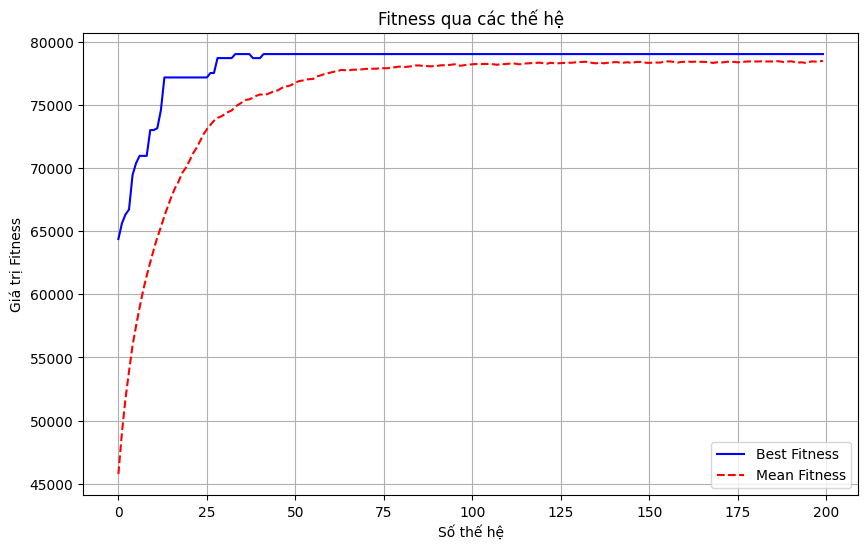

In [8]:
# Hiển thị biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(range(GENERATIONS), best_fitness_history, label='Best Fitness', color='blue')
plt.plot(range(GENERATIONS), mean_fitness_history, label='Mean Fitness', color='red', linestyle='--')

plt.title('Fitness qua các thế hệ')
plt.xlabel('Số thế hệ')
plt.ylabel('Giá trị Fitness')
plt.legend()
plt.grid(True)
plt.show()

**Với tham số thay đổi:**

POPULATION_SIZE = 500 (giúp thuật toán đạt được kết quả tối ưu hơn nhưng thời gian chạy sẽ lâu) **(có thể chưa tối ưu)**

Mutation rate = 0.04 (vì nó giúp cải thiện mean fitness) **(có thể đã tối ưu)**

**Tham số giữ nguyên:**

Crossover rate = 0.8 (vì nó giúp ổn định các thế hệ về sau) **(có thể đã tối ưu)**

GENERATIONS = 200 **(chưa biết)**

**Kết luận:** Cải thiện được meanfitness nhưng vẫn bị hội tụ sớm


